##### 【 ML - 생선 분류 모델 만들기 1 】
- 주__제 : 2개 종류 생선 분류 모델 만들기
- 데이터 : ../DATA/fish.csv
- 피쳐들 : 길이와 무게. 실수형
- 타__겟 : 생선 종류
- 학습종류 : 지도학습 -> 분류
- 학습방법 : 다양한 분류 알고리즘들 => KNN 최근접이웃알고리즘

[1] 데이터 확인 : 피쳐와 타겟 <hr>

In [ ]:
# %pip install koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
## [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [39]:
## [1-2] 데이터 로딩
DATA_FILE = '../DATA/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
display(allDF.head(3))

## Bream 도미, Smelt 빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 인덱스 정리
fishDF.reset_index(drop=True, inplace=True)
display(fishDF.head(3), fishDF.tail(3))
fishDF.info()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


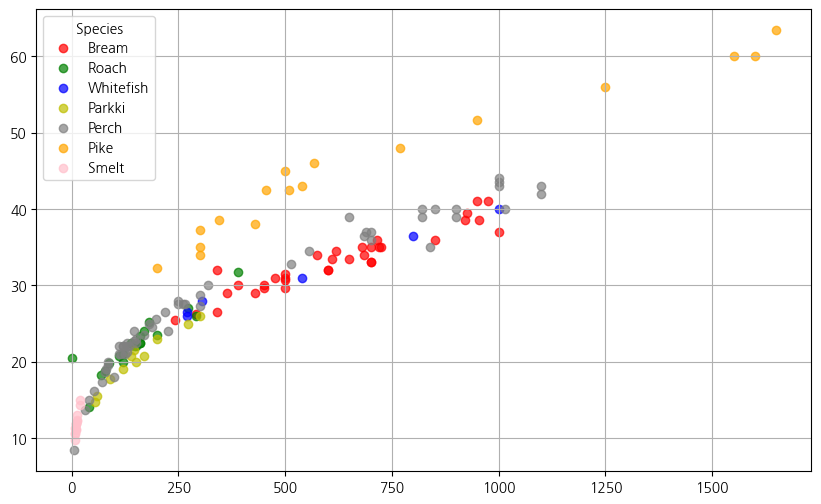

In [ ]:
# ## [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부
# # -> 모든 종류 다

# ## - 시각화
# print(allDF['Species'].unique())
# color = ['r','g','b','y','gray','orange','pink']
# plt.figure(figsize=(10, 6))
# for a, co in zip(allDF['Species'].unique(), color):
#     df = allDF[allDF['Species'] == a]
#     plt.scatter(df['Weight'], df['Length'], c=co,label=a, alpha=0.7)
    
# plt.legend(title='Species')
# plt.grid(True)
# plt.show()
# ## - 상관계수


[0 1]


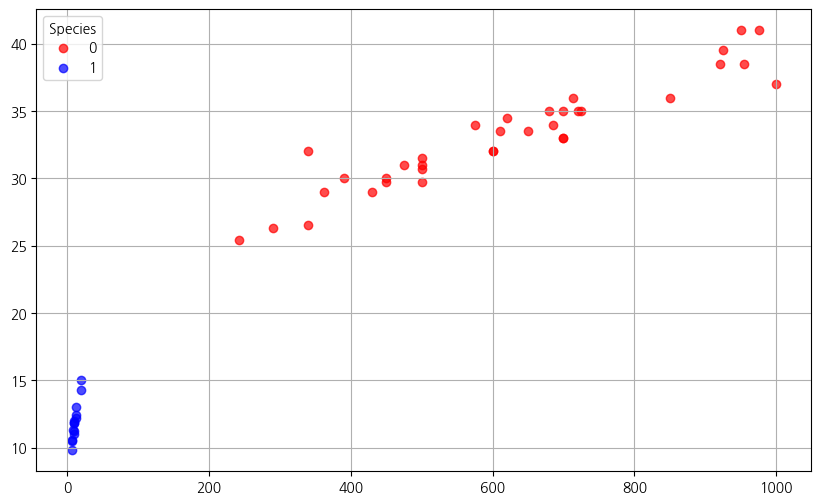

C:\Users\qjadl\AppData\Local\Temp\ipykernel_30616\866141698.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishDF['Species'] = fishDF['Species'].astype('category').cat.codes ## cat는 접근자임 -> codes치면 알아서 0이랑 1로 바꿔줌


,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int8   
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int8(1)
memory usage: 965.0 bytes


In [ ]:
## [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부
## - 시각화
print(fishDF['Species'].unique())
color = ['r','b']
plt.figure(figsize=(10, 6))
for a, co in zip(fishDF['Species'].unique(), color):
    df = fishDF[fishDF['Species'] == a]
    plt.scatter(df['Weight'], df['Length'], c=co, label=a, alpha=0.7)
    
plt.legend(title='Species')
plt.grid(True)
plt.show()

## - 상관계수
fishDF[['Length','Weight']].corr()


### -----------------------------------------------
## 강사님 풀이
## [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부
## [0,1] 로 바꾸는거임
# pd.set_option('future.no_silent_downcasting', True) ## text{pandas}$가 데이터를 화면에 표시(출력)하는 방식을 제어
# fishDF.loc[:,'Species'] = fishDF.loc[:,'Species'].replace({'Bream':0, 'Smelt':1})
# fishDF.Species = fishDF.Species.astype('category')
# print(fishDF.Species)

## 위에는 복잡하고 아래처럼 쓰면 더욱 쉬움
## 1. 타입을 먼저 카테고리로 바꿔주고
## 2. cat접근자로 0,1로 변환함
fishDF['Species'] = fishDF['Species'].astype('category').cat.codes ## cat는 접근자임 -> codes치면 카테고리를 숫자로 변환해줌
display(fishDF.head(3))
fishDF.info()


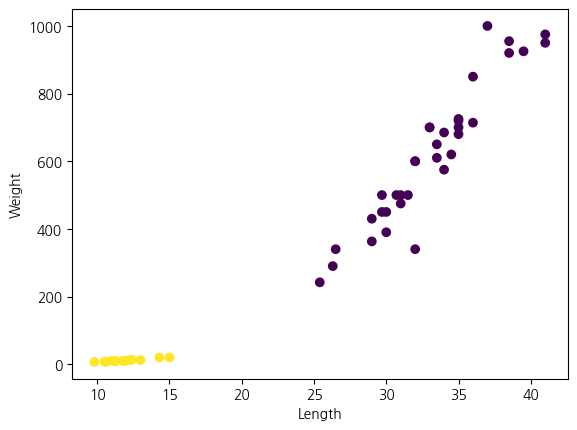

,Species,Weight,Length
Species,1.000000,-0.843828,-0.944132
Weight,-0.843828,1.000000,0.960347
Length,-0.944132,0.960347,1.000000


In [49]:
## - 시각화 : 산점도 => 색상을 품종에 따라 다르게 설정 c 매개변수
plt.scatter(fishDF.Length, fishDF.Weight, c=fishDF.Species) ## 컬러에다가 컬럼명을 넣어주면 알아서 색깔이 나옴
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

## - 상관계수
fishDF.corr(numeric_only=True)